In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# load the data
data = pd.read_csv('restaurant_reviews.csv')
data.head()

,Review,Rating
0,This place has the best dumplings I've ever ha...,5
1,"Came here on a weekend visit to NY, my friend ...",4
2,The best soup dumplings in NYC! There is no ot...,5
3,I was so disappointed with my visit to Joes. N...,1
4,So much fun! we stayed at Hotel 50\r\nRight n...,5


In [21]:
nlp = spacy.load('en_core_web_sm')
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)  # Keep only lowercase and uppercase letters
    text = re.sub('\s+', ' ', text)  # Replace multiple whitespace characters with a single space
    text = nlp(text)
    text = [word.lemma_ for word in text if not word.is_stop and not word.is_punct and not word.like_num]
    text = ' '.join(text)
    return text

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\A S U S\AppData\Local\Temp\ipykernel_1812\1311990623.py:5: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Replace multiple whitespace characters with a single space


In [22]:
# Define a custom tokenizer
def custom_tokenizer(text):
    # Use NLTK's word_tokenize function to tokenize the text
    tokens = word_tokenize(text)
    # Return the tokens
    return tokens


In [23]:
# lets create a new feature 'Length' and 'Sentiment'
data['Length'] = data['Review'].apply(len)
data['Sentiment'] = data['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')


In [24]:
# X = tfidf_vectorizer.fit_transform(data['Tokenized_Review'].apply(' '.join))
# y = data['Sentiment']

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# models = {'LR' : LogisticRegression(), 'RF' : RandomForestClassifier(), 'NB' : MultinomialNB(), 'SVM' : SVC()}
# vectorizers = {'TF-IDF' : TfidfVectorizer()}

# parameters = {'LR' : {'C' : [0.001, 0.01, 0.1, 1, 10, 100]},
#                 'RF' : {'n_estimators' : [50, 100, 200]},
#                 'NB' : {'alpha' : [0.5, 1, 2]},
#                 'SVM' : {'C' : [0.1, 1, 10], 'gamma' : [0.1, 1, 10]}}
# results = []

# for model_name, model in models.items():
#     for vectorizer_name, vectorizer in vectorizers.items():
#         pipeline = GridSearchCV(model, parameters[model_name], cv=5)
#         pipeline.fit(vectorizer.fit_transform(data['Tokenized_Review'].apply(' '.join)), data['Sentiment'])
#         results.append({'model' : model_name, 'vectorizer' : vectorizer_name, 'best_params' : pipeline.best_params_, 'best_score' : pipeline.best_score_})


In [27]:
# results = pd.DataFrame(results)
# results

In [28]:
# # lets train the model
# model = LogisticRegression(C=1)
# model.fit(X_train, y_train)
# # use k-fold cross validation to evaluate the model
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X_train, y_train, cv=5)
# print('Cross-validation scores: {}'.format(scores))
# print('Average cross-validation score: {:.2f}'.format(scores.mean()))

In [29]:
# confusion_matrix(y_test, model.predict(X_test))

In [30]:
# # lets try svm
# model = SVC(C=10, gamma=1)
# model.fit(X_train, y_train)
# # use k-fold cross validation to evaluate the model
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X_train, y_train, cv=5)
# print('Cross-validation scores: {}'.format(scores))
# print('Average cross-validation score: {:.2f}'.format(scores.mean()))

In [31]:
data.Sentiment.value_counts()

Sentiment
Positive    5042
Negative    2238
Name: count, dtype: int64

In [32]:
# lets extract equal number of positive and negative reviews
positive_reviews = data[data['Sentiment'] == 'Positive'].sample(2238)
negative_reviews = data[data['Sentiment'] == 'Negative'].sample(2238)


In [33]:
data = pd.concat([positive_reviews, negative_reviews]).reset_index(drop=True)
data.Sentiment.value_counts()

Sentiment
Positive    2238
Negative    2238
Name: count, dtype: int64

In [34]:
data.head()

,Review,Rating,Length,Sentiment
0,Prompt service. Wait wasn't that bad. Organize...,5,208,Positive
1,The soup dumplings!!' WOW!! I'm still thinking...,5,404,Positive
2,My friend brought me here and it was on my lis...,5,328,Positive
3,THE BEST PORK DUMPLINGS IN THE WORLD!! Steamy ...,5,402,Positive
4,As good as it gets! What a wonderful place. Ev...,5,457,Positive


In [35]:
data['Review'] = data['Review'].apply(clean_text)

In [36]:
data.head()

,Review,Rating,Length,Sentiment
0,prompt service wait wasn t bad organize food f...,5,208,Positive
1,soup dumpling wow m think day later try impres...,5,404,Positive
2,friend bring list place visit ny order crab be...,5,328,Positive
3,good pork dumpling world steamy soupy bite eat...,5,402,Positive
4,good get wonderful place time downtown manhatt...,5,457,Positive


In [ ]:
# Convert text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer)

In [ ]:
X = tfidf.fit_transform(data['Review'])
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# # lets train the model
# models = {'LR' : LogisticRegression(), 'RF' : RandomForestClassifier(), 'NB' : MultinomialNB(), 'SVM' : SVC()}
# vectorizers = {'TF-IDF' : TfidfVectorizer()}

# parameters = {'LR' : {'C' : [0.001, 0.01, 0.1, 0.4]},
#                 'RF' : {'n_estimators' : [50, 100, 200], 'max_depth' : [25, 30, 32, 35, 38]},
#                 'NB' : {'alpha' : [0.5, 1, 2]},
#                 'SVM' : {'C' : [0.1, 1, 10], 'gamma' : [0.1, 1, 2], 'kernel' : ['linear', 'rbf']}}
# results = []


# for model_name, model in models.items():
#     for vectorizer_name, vectorizer in vectorizers.items():
#         pipeline = GridSearchCV(model, parameters[model_name], cv=5)
#         pipeline.fit(vectorizer.fit_transform(data['Review']), data['Sentiment'])
#         results.append({'model' : model_name, 'vectorizer' : vectorizer_name, 'best_params' : pipeline.best_params_, 'best_score' : pipeline.best_score_})

In [ ]:
# results = pd.DataFrame(results)
# # lets see the params of random forest
# results

In [ ]:
# lets try naive bayes 
model = MultinomialNB(alpha=2)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Cross-validation scores: [0.82122905 0.84357542 0.83379888 0.84357542 0.81005587]
Average cross-validation score: 0.83


In [ ]:
accuracy_score(y_test, model.predict(X_test))
confusion_matrix(y_test, model.predict(X_test))

array([[382,  52],
       [100, 362]], dtype=int64)

In [ ]:
model = SVC(C=10, gamma=1, kernel='rbf')
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Cross-validation scores: [0.81564246 0.83240223 0.81145251 0.81005587 0.82122905]
Average cross-validation score: 0.82


In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8158482142857143

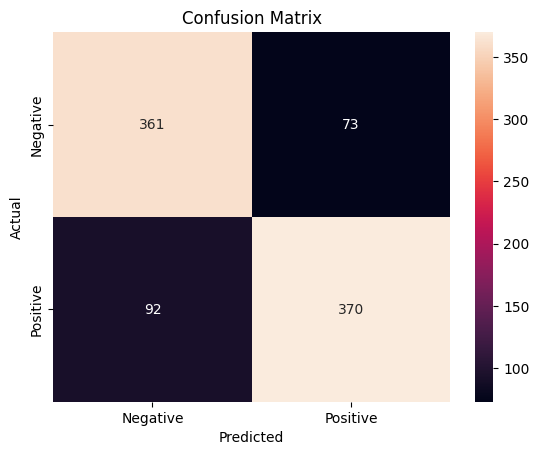

In [ ]:
# create a heatmap
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# insted of using the default labels, lets use the actual labels
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.show()